In [3]:
import pandas as pd

df = pd.read_csv("data1.csv",low_memory=False)
print(f'HomeC.csv : {df.shape}')
df.head(3)

HomeC.csv : (503852, 31)


,Unnamed: 0,time,gen..kW.,House.overall..kW.,Dishwasher..kW.,Furnace.1..kW.,Furnace.2..kW.,Home.office..kW.,Fridge..kW.,Wine.cellar..kW.,...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,59,2016-01-01 00:58:00,0.003417,0.714200,0.000033,0.021083,0.309983,0.043067,0.005167,0.123317,...,10.0,Mostly Cloudy,-1.44,1016.25,8.29,0.75,285,0.0,-4.5,0.0
1,60,2016-01-01 00:59:00,0.003417,0.497067,0.000017,0.096983,0.062867,0.043283,0.005000,0.123283,...,10.0,Mostly Cloudy,-1.44,1016.25,8.29,0.75,285,0.0,-4.5,0.0
2,61,2016-01-01 01:00:00,0.003450,0.465133,0.000017,0.064500,0.062633,0.043250,0.005017,0.123350,...,10.0,Mostly Cloudy,-1.44,1016.25,8.29,0.75,285,0.0,-4.5,0.0


In [4]:
df1 = df.drop('Unnamed: 0', axis=1)
df1.head()

,time,gen..kW.,House.overall..kW.,Dishwasher..kW.,Furnace.1..kW.,Furnace.2..kW.,Home.office..kW.,Fridge..kW.,Wine.cellar..kW.,Garage.door..kW.,...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,2016-01-01 00:58:00,0.003417,0.714200,0.000033,0.021083,0.309983,0.043067,0.005167,0.123317,0.013183,...,10.0,Mostly Cloudy,-1.44,1016.25,8.29,0.75,285,0.0,-4.5,0.0
1,2016-01-01 00:59:00,0.003417,0.497067,0.000017,0.096983,0.062867,0.043283,0.005000,0.123283,0.012883,...,10.0,Mostly Cloudy,-1.44,1016.25,8.29,0.75,285,0.0,-4.5,0.0
2,2016-01-01 01:00:00,0.003450,0.465133,0.000017,0.064500,0.062633,0.043250,0.005017,0.123350,0.012950,...,10.0,Mostly Cloudy,-1.44,1016.25,8.29,0.75,285,0.0,-4.5,0.0
3,2016-01-01 01:01:00,0.003417,0.512933,0.000017,0.111333,0.063883,0.043300,0.004967,0.123867,0.012883,...,10.0,Mostly Cloudy,-1.44,1016.25,8.29,0.75,285,0.0,-4.5,0.0
4,2016-01-01 01:02:00,0.003417,0.651283,0.000017,0.114583,0.063200,0.043283,0.114167,0.124267,0.012917,...,10.0,Mostly Cloudy,-1.44,1016.25,8.29,0.75,285,0.0,-4.5,0.0


In [5]:
# Sumamos furnace 1 y 2 y kitchens
df1['Furnace..kW.'] = df1['Furnace.1..kW.'] + df1['Furnace.2..kW.']
df1['Kitchen..kW.'] = df1['Kitchen.12..kW.'] + df1['Kitchen.14..kW.'] + df1['Kitchen.38..kW.']
df1.drop(['Furnace.1..kW.', 'Furnace.2..kW.', 'Kitchen.12..kW.', 'Kitchen.14..kW.', 'Kitchen.38..kW.'], axis =1, inplace=True)

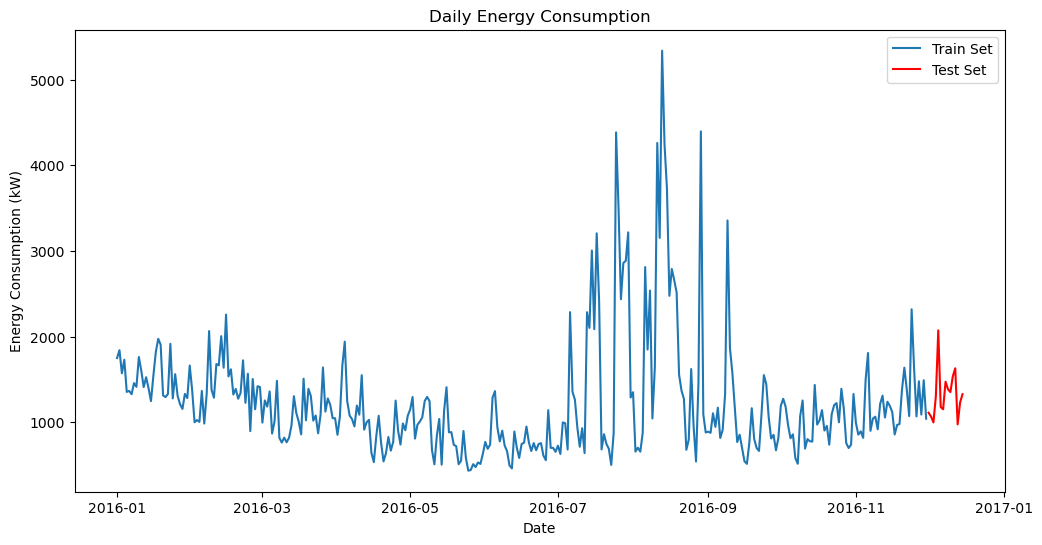

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score, mean_absolute_error
import numpy as np


# Load and preprocess data
df1['time'] = pd.to_datetime(df1['time'])
df1.set_index('time', inplace=True)

# Define columns for energy consumption and weather variables
energy_cols = ['House.overall..kW.']  # Add more as needed
weather_cols = ['apparentTemperature', 'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability']

# Resample data daily
df_daily = df1[energy_cols + weather_cols].resample('D').sum()

# Split data into training and testing
train_size = len(df_daily) - 15
train_set, test_set = df_daily.iloc[:train_size], df_daily.iloc[train_size:]

# Visualization of data
plt.figure(figsize=(12, 6))
plt.plot(train_set.index, train_set['House.overall..kW.'], label='Train Set')
plt.plot(test_set.index, test_set['House.overall..kW.'], label='Test Set', color='r')
plt.title('Daily Energy Consumption')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kW)')
plt.legend()
plt.show()


C:\Users\lopez\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                     
Dep. Variable:                House.overall..kW.   No. Observations:                  335
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -2471.846
Date:                           Tue, 21 May 2024   AIC                           4969.692
Time:                                   20:37:18   BIC                           5018.599
Sample:                               01-01-2016   HQIC                          4989.226
                                    - 11-30-2016                                         
Covariance Type:                             opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
apparentTemperature    -0.0066      0.036     -0.181      0.856      -0.078       0.065
pressure        

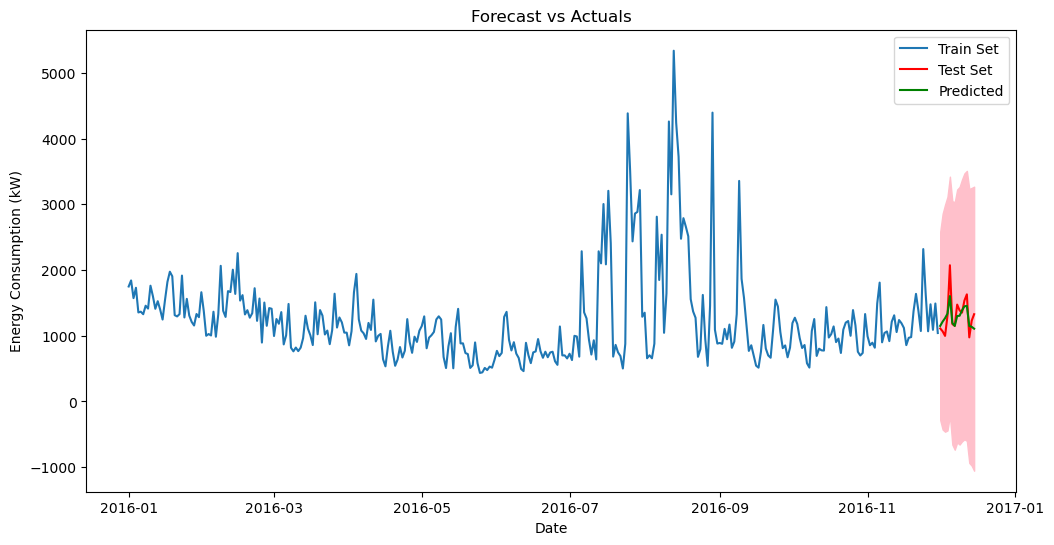

The RMSE of the model is 179.07775936585176 kW
The MAPE of the model is 9.99%
The MAE of the model is 134.39833495665445 kW


In [21]:

# Create SARIMAX model
sarimax_model = SARIMAX(train_set['House.overall..kW.'],
                        exog=train_set[weather_cols],
                        order=(1, 1, 1),
                        seasonal_order=(1, 1, 1, 7),
                        enforce_stationarity=False,
                        enforce_invertibility=False)

# Fit the model
sarimax_result = sarimax_model.fit(disp=False)
print(sarimax_result.summary())

# Predict
predictions = sarimax_result.get_forecast(steps=15, exog=test_set[weather_cols])
predicted_means = predictions.predicted_mean
conf_int = predictions.conf_int()

# Visualization of predictions
plt.figure(figsize=(12, 6))
plt.plot(train_set.index, train_set['House.overall..kW.'], label='Train Set')
plt.plot(test_set.index, test_set['House.overall..kW.'], label='Test Set', color='r')
plt.plot(test_set.index, predicted_means, label='Predicted', color='g')
plt.fill_between(test_set.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink')
plt.title('Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kW)')
plt.legend()
plt.show()

def plot_predicted_values2(col,pred_col):
    plt.figure(figsize=(15, 10))
    plt.plot(time_index_train, train_set[col].to_numpy(), label='train set - observed')
    plt.plot(time_index_test, test_set[col].to_numpy(), label='test set - observed')
    plt.plot(time_index_train, train_set[pred_col].to_numpy(), label='train set - predicted')
    plt.plot(time_index_test, test_set[pred_col].to_numpy(), label='test set - predicted')
    plt.ylabel(col)
    plt.title(f'15-day energy consumption prediction using {pred_col} model')
    plt.legend()
    plt.show()
    


#plot_predicted_values2("House.overall..kW.",'SARIMAX')

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_set['House.overall..kW.'], predicted_means))
print(f'The RMSE of the model is {rmse} kW')
mape = mean_absolute_percentage_error(test_set['House.overall..kW.'], predicted_means) * 100  # Convert to percentage
print(f'The MAPE of the model is {mape:.2f}%')

# Calcular el R-squared
#r2 = r2_score(test_set['House.overall..kW.'], predicted_means)
#print(f'The R-squared of the model is {r2}')
# Calcular Mean Absolute Error (MAE)
mae = mean_absolute_error(test_set['House.overall..kW.'], predicted_means)
print(f'The MAE of the model is {mae} kW')


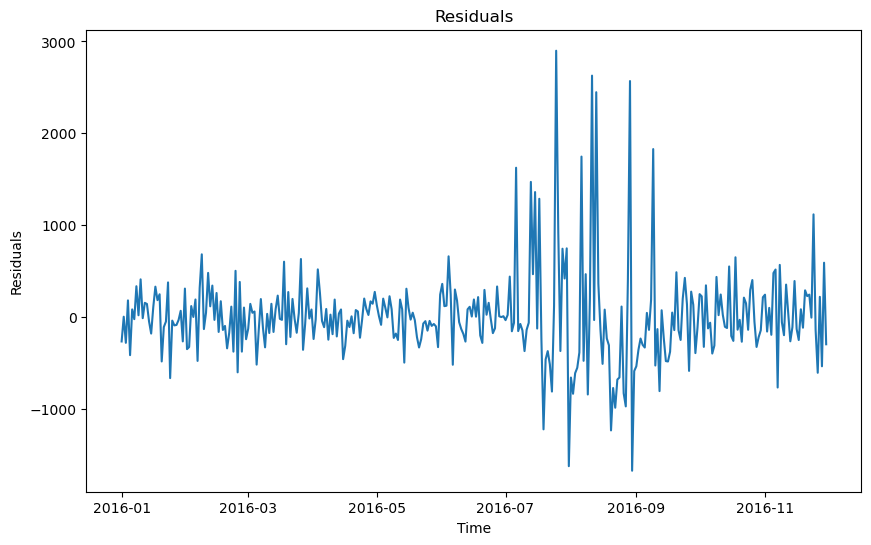

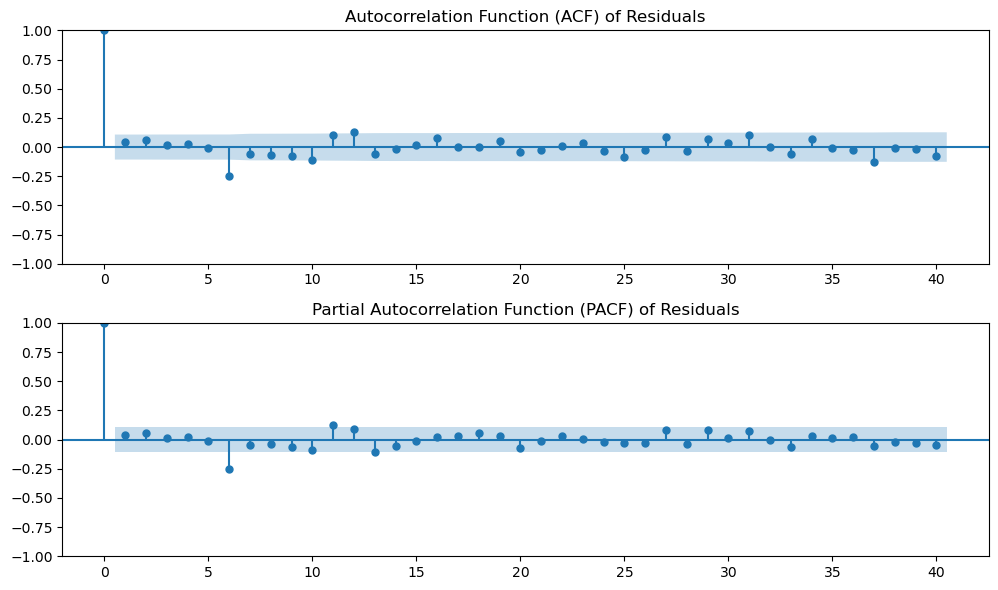

In [11]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Analizar residuales
residuals = sarimax_result.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

# ACF y PACF de los residuales
plt.figure(figsize=(10, 6))
plt.subplot(211)
plot_acf(residuals, ax=plt.gca(), lags=40)
plt.title('Autocorrelation Function (ACF) of Residuals')
plt.subplot(212)
plot_pacf(residuals, ax=plt.gca(), lags=40)
plt.title('Partial Autocorrelation Function (PACF) of Residuals')
plt.tight_layout()
plt.show()
